In [40]:
import pandas as pd
import numpy as np

In [23]:
%matplotlib inline

In [12]:
pd.set_option('display.max_columns', 200)

In [17]:
cols = [
    'Country',
    'Employment',
    'ConvertedSalary',
    'LanguageWorkedWith',
    'NumberMonitors',
    'Gender',
    'WakeTime',
    'Age',
]

df = pd.read_csv('survey_results_public.csv', usecols=cols)

/Users/christophe.blefari/.virtualenvs/lab/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (65,75,114,120,124) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [174]:
df.to_csv('so_data.csv', index=False)

In [20]:
df.head()

,Country,Employment,ConvertedSalary,LanguageWorkedWith,NumberMonitors,WakeTime,Gender,Age
0,Kenya,Employed part-time,NaN,JavaScript;Python;HTML;CSS,1,Between 5:00 - 6:00 AM,Male,25 - 34 years old
1,United Kingdom,Employed full-time,70841.0,JavaScript;Python;Bash/Shell,2,Between 6:01 - 7:00 AM,Male,35 - 44 years old
2,United States,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,Employed full-time,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,2,Between 6:01 - 7:00 AM,Male,35 - 44 years old
4,South Africa,Employed full-time,21426.0,C;C++;Java;Matlab;R;SQL;Bash/Shell,2,Before 5:00 AM,Male,18 - 24 years old


### Q2. Tracer un pie chart avec la répartition des genres

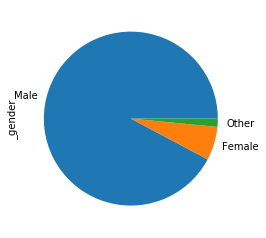

In [33]:
df['_gender'] = df['Gender'].apply(lambda x: x if x in ['Male', 'Female'] or pd.isnull(x) else 'Other')

df['_gender'].value_counts().plot(kind='pie')

### Q3. Trouver les pays où il y a plus de femmes qui ont répondu que d'hommes

In [86]:
total_per_country = df.groupby(['Country', '_gender']).agg({'_gender': len}).rename(columns={'_gender': 'total'})

In [102]:
total_computed = total_per_country.reset_index().pivot_table(index='Country', columns='_gender', values='total')
total_computed.fillna(0, inplace=True)

In [105]:
list(total_computed[total_computed['Female'] > total_computed['Male']].index)

[]

In [108]:
(total_computed['Female'] / (total_computed['Female'] + total_computed['Male'])).sort_values(ascending=False)

Country
Malawi                                       0.333333
Myanmar                                      0.217391
Jamaica                                      0.181818
Andorra                                      0.166667
Rwanda                                       0.166667
Fiji                                         0.166667
Jordan                                       0.155556
Libyan Arab Jamahiriya                       0.142857
Maldives                                     0.142857
Philippines                                  0.142336
Armenia                                      0.135593
Tunisia                                      0.130435
Taiwan                                       0.130435
Iraq                                         0.125000
Malaysia                                     0.120000
Lebanon                                      0.119403
Saudi Arabia                                 0.119403
The former Yugoslav Republic of Macedonia    0.114286
Uruguay             

### Q4. Afficher le genre par tranche d'age

In [109]:
import seaborn as sns

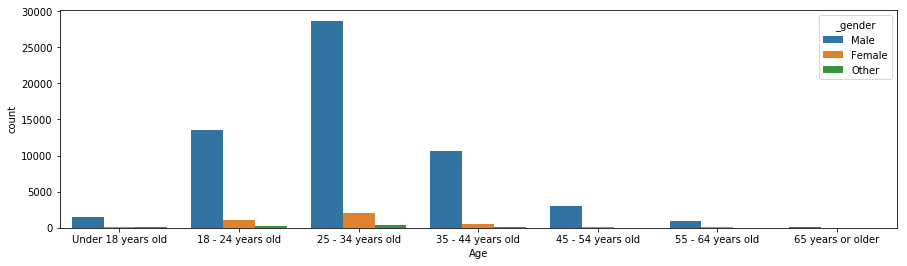

In [126]:
plt.figure(figsize=(15, 4))

age_order = [
    'Under 18 years old',
    '18 - 24 years old',
    '25 - 34 years old',
    '35 - 44 years old',
    '45 - 54 years old',
    '55 - 64 years old',
    '65 years or older',
]

sns.countplot(x='Age', hue='_gender', data=df, order=age_order)

### Q5. Dire combien de personnes travaillent avec plus de 3 écrans

In [134]:
counts = df['NumberMonitors'].value_counts()
counts[counts.index > '3'].sum()

1989

### Q6. Trouver à quelle heure se lèvent les retraités le plus souvent

In [140]:
df[df['Employment'] == 'Retired']['WakeTime'].value_counts()

Between 6:01 - 7:00 AM          48
I do not have a set schedule    41
Between 7:01 - 8:00 AM          26
Between 5:00 - 6:00 AM          17
Between 8:01 - 9:00 AM          12
Before 5:00 AM                   6
Between 9:01 - 10:00 AM          6
Between 10:01 - 11:00 AM         3
After 12:01 PM                   3
I work night shifts              2
Between 11:01 AM - 12:00 PM      1
Name: WakeTime, dtype: int64

### Q7. Tracer la courbe du salaire moyen en fonction de l'âge

In [161]:
age_mapping = {
    '25 - 34 years old': 34,
    '18 - 24 years old': 24,
    '35 - 44 years old': 44,
    '45 - 54 years old': 54,
    'Under 18 years old': 18,
    '55 - 64 years old': 64,
    '65 years or older': 100,
}

df['_age'] = df['Age'].apply(lambda x: age_mapping[x] if pd.notnull(x) else None)

salary_age = df[['ConvertedSalary', '_age']].dropna().groupby('_age')['ConvertedSalary'].mean()

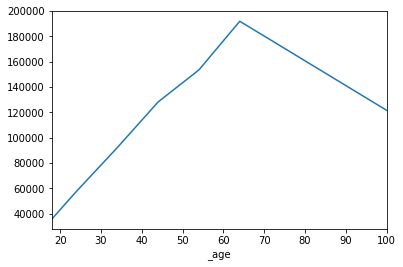

In [162]:
salary_age.plot(kind='line', x='_age', y='ConvertedSalary')

### Q8. Donner le pourcentage de personne qui font du Python

In [173]:
df['LanguageWorkedWith'].str.contains('Python').sum() / len(df) * 100

30.710636791259926